In [93]:
import sys
import twitter
import json
import pickle
from prettytable import PrettyTable
from collections import Counter

In [2]:
CONSUMER_KEY = 'ehnrwmKJ6qei3QrRUjPCUf8f5'
CONSUMER_SECRET = 'K6IG1WuDgXStrlamO42gAFkqMsnY7l1IGEsz66Lhbkui0Q4hJk'
OAUTH_TOKEN = '240242735-A079WuyKWEuFp0WxUt1Y863MGnz64Y65AZKSEtlY'
OAUTH_TOKEN_SECRET = 'G64mx1kRBgR5zafYiP5kLpTUOIaq8rqn5gjNtm5XQv55u'
auth = twitter.oauth.OAuth(OAUTH_TOKEN, OAUTH_TOKEN_SECRET, CONSUMER_KEY, CONSUMER_SECRET)
twitter_api = twitter.Twitter(auth=auth)
print(twitter_api)

In [95]:
q = '#Coronavirus'
count = 1000

search_results = twitter_api.search.tweets(q=q,count = count)
statuses = search_results['statuses']

print(type(statuses))
# print(json.dumps(statuses[0],indent=1))

<class 'list'>


In [99]:
status_texts = [ status['text'] for status in statuses ]
# print(json.dumps(status_texts, indent=1))

import pickle

filepath = "my_data.pickle"

with open(filepath, "wb") as f:
    pickle.dump(words, f)

In [97]:
from  nltk.corpus import stopwords
words = stopwords.words('english')
for w in ['!',',','.','?','-s','-ly','</s>','s','RT','-','de','en','You','@XHNews:']:
    words.append(w)

In [98]:
text_3 = []
for status_text in status_texts:
    text_1 = status_text.split()
    text_2 = [word for word in text_1 if word not in words]
    text_3.append(text_2)
# print(text_3)

output=[]
for t in text_3:
    output.extend(t)
    
c = Counter(output)
print(c.most_common()[:10])

[('#coronavirus', 45), ('#Coronavirus', 11), ('la', 9), ('los', 8), ('Jan', 8), ('el', 8), ('The', 7), ('novel', 6), ('patients', 6), ('&amp;', 5)]


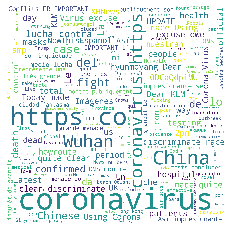

In [148]:
from wordcloud import WordCloud

str = ' '
str.join(output)
wordcloud = WordCloud(background_color="white",width=2000, height=2000, margin=2).generate(str.join(output))

import matplotlib.pyplot as plt
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

wordcloud.to_file('test.png')